In [126]:
import tensorflow as tf  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [127]:
import keras

In [128]:
import glob

In [129]:
train_files=glob.glob("C:/Users/anwes/Downloads/archive (2)/flowers/*/**")

In [130]:
len(train_files)

15740

In [131]:
train_files

['C:/Users/anwes/Downloads/archive (2)/flowers\\astilbe\\10091895024_a2ea04cda6_c.jpg',
 'C:/Users/anwes/Downloads/archive (2)/flowers\\astilbe\\1033455028_f0c6518ec9_c.jpg',
 'C:/Users/anwes/Downloads/archive (2)/flowers\\astilbe\\10373087134_927b53fb9f_c.jpg',
 'C:/Users/anwes/Downloads/archive (2)/flowers\\astilbe\\1052212431_4963309d03_c.jpg',
 'C:/Users/anwes/Downloads/archive (2)/flowers\\astilbe\\1052219251_d03970e956_c.jpg',
 'C:/Users/anwes/Downloads/archive (2)/flowers\\astilbe\\1052586928_366c5255b8_c.jpg',
 'C:/Users/anwes/Downloads/archive (2)/flowers\\astilbe\\1052587144_34c9f0714c_c.jpg',
 'C:/Users/anwes/Downloads/archive (2)/flowers\\astilbe\\1053073526_188a5b816e_c.jpg',
 'C:/Users/anwes/Downloads/archive (2)/flowers\\astilbe\\1053075100_838051e5b7_c.jpg',
 'C:/Users/anwes/Downloads/archive (2)/flowers\\astilbe\\1053079170_650c3c6af6_c.jpg',
 'C:/Users/anwes/Downloads/archive (2)/flowers\\astilbe\\1053080414_1edf92651d_c.jpg',
 'C:/Users/anwes/Downloads/archive (2)/fl

In [132]:
from random import shuffle
shuffle(train_files)
train_files

['C:/Users/anwes/Downloads/archive (2)/flowers\\black_eyed_susan\\15282326352_137d7df6f0_c.jpg',
 'C:/Users/anwes/Downloads/archive (2)/flowers\\black_eyed_susan\\2906456206_f36f68988c_c.jpg',
 'C:/Users/anwes/Downloads/archive (2)/flowers\\dandelion\\19805128_d147366709_c.jpg',
 'C:/Users/anwes/Downloads/archive (2)/flowers\\calendula\\50834621078_4c5bf84309_c.jpg',
 'C:/Users/anwes/Downloads/archive (2)/flowers\\california_poppy\\18045794459_dd6c0d24c8_c.jpg',
 'C:/Users/anwes/Downloads/archive (2)/flowers\\dandelion\\536109233_739730a6f4_c.jpg',
 'C:/Users/anwes/Downloads/archive (2)/flowers\\daffodil\\4463250602_489e6c923c_c.jpg',
 'C:/Users/anwes/Downloads/archive (2)/flowers\\daffodil\\3541267272_06e29f68a2_c.jpg',
 'C:/Users/anwes/Downloads/archive (2)/flowers\\coreopsis\\2558108038_7d33513a7c_c.jpg',
 'C:/Users/anwes/Downloads/archive (2)/flowers\\calendula\\51581203653_dfd9ea1e9d_c.jpg',
 'C:/Users/anwes/Downloads/archive (2)/flowers\\daffodil\\3461275384_a730676716_c.jpg',
 '

In [133]:
from PIL import Image
from matplotlib import pyplot as plt

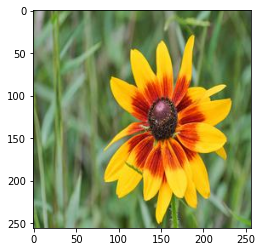

In [134]:
img = Image.open(train_files[0])
plt.imshow(img)

In [135]:
np.array(img).shape

(256, 256, 3)

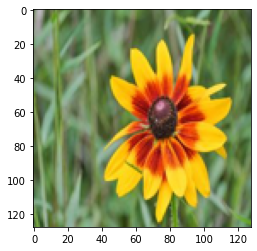

In [136]:
img = img.resize((128,128)) 
plt.imshow(img)

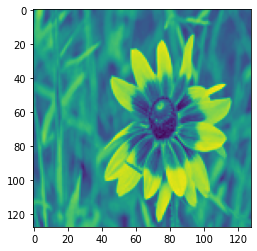

In [137]:
imgGray = img.convert('L')
plt.imshow(imgGray)

In [138]:
np.array(imgGray).shape

(128, 128)

In [139]:
def find_flower_name(fl):
    if(fl.find("astilbe")!= -1 ):
        return 1
    if(fl.find("bellflower")!= -1 ):
        return 2
    if(fl.find("black_eyed_susan")!= -1 ):
        return 3
    if(fl.find("calendula")!= -1 ):
        return 4
    if(fl.find("california_poppy")!= -1 ):
        return 5
    if(fl.find("carnation")!= -1 ):
        return 6
    if(fl.find("common_daisy")!= -1 ):
        return 7
    if(fl.find("coreopsis")!= -1 ):
        return 8
    if(fl.find("daffodil")!=-1):
        return 9
    if(fl.find("dandelion")!=-1):
        return 10
    if(fl.find("iris")!=-1):
        return 11
    if(fl.find("magnolia")!=-1):
        return 12
    if(fl.find("rose")!=-1):
        return 13
    if(fl.find("sunflower")!=-1):
        return 14
    if(fl.find("tulip")!=-1):
        return 15
    if(fl.find("water_lily")!=-1):
        return 16

In [140]:
from PIL import Image
X_train=np.zeros((len(train_files),128,128))
Y_train=np.zeros((len(train_files),1))

for i, file in enumerate(train_files):
    #i stores index
    #file stores image path
    
    img = Image.open(file)
    
    #resizing the image from original size to (128,128,3) so that it fits X_train array
    img = img.resize((128,128))

    #converting all RGB to grayscale #now image array dimension is (128,128)
    img = img.convert('L')
#     plt.imshow(img)
    
    
    img_array=np.array(img) 
#     print(img_array.shape ) 
    
    if( img_array.shape == (128,128)): #checking condition so only valid dimension of image array is entered into X_train
        X_train[i,:,:]=img_array
# # #     print(X_train)
    
    Y_train[i] = find_flower_name(train_files[i])



In [141]:
X_train[0]

array([[ 96., 141., 169., ...,  94.,  93.,  87.],
       [105., 147., 173., ...,  88.,  88.,  85.],
       [115., 154., 176., ...,  82.,  82.,  81.],
       ...,
       [ 81., 109., 141., ..., 130., 130., 131.],
       [ 99., 106., 139., ..., 116., 112., 117.],
       [114., 109., 136., ..., 121., 107.,  96.]])

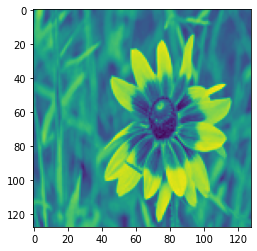

In [142]:
img = Image.fromarray(np.uint8(X_train[0]) , 'L')
plt.imshow(img)